In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("..")
import splitwavepy as sw

import numpy as np
import matplotlib.pyplot as plt

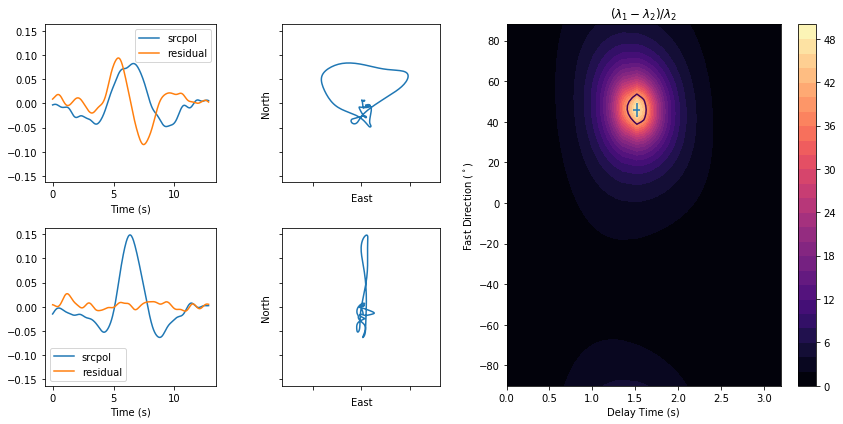

In [25]:
a = sw.EigenM(split=(45,1.5),delta=0.04,noise=0.05)
a.plot(marker=True,conf95=True)

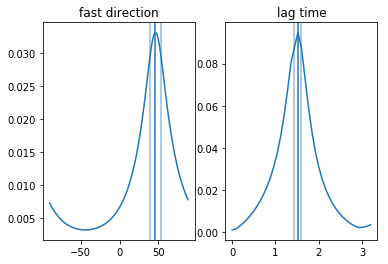

In [26]:
# Error analysis
fig,ax = plt.subplots(2)
ax0 = plt.subplot(121)
ax1 = plt.subplot(122)

ax0.plot(a.degs[0,:],a.fastprofile())
ax0.axvline(a.fast)
ax0.axvline(a.fast-2*a.dfast,alpha=0.5)
ax0.axvline(a.fast+2*a.dfast,alpha=0.5)
ax0.set_title('fast direction')

ax1.plot(a.lags[:,0],a.lagprofile())
ax1.axvline(a.lag)
ax1.axvline(a.lag-2*a.dlag,alpha=0.5)
ax1.axvline(a.lag+2*a.dlag,alpha=0.5)
ax1.set_title('lag time')

plt.show()

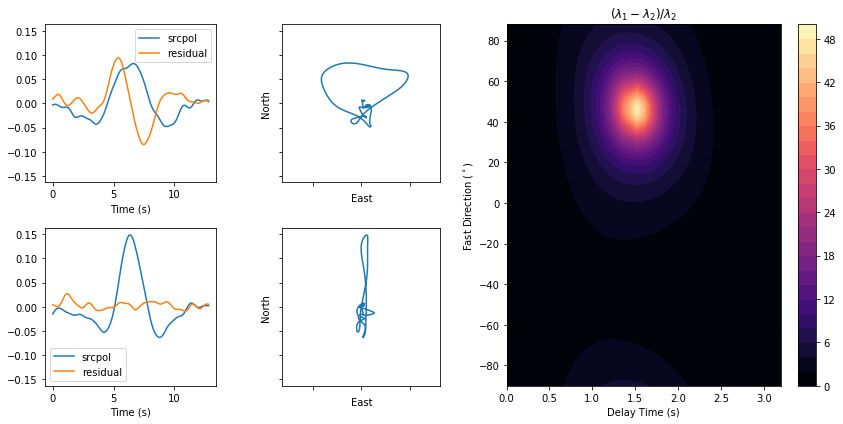

In [27]:
a.plot()

In [29]:
pr = sw.Pair(split=(45,1.5),delta=0.05,noise=0.05)
bs = sw.eigval.Bootstrap(pr,nits=10)

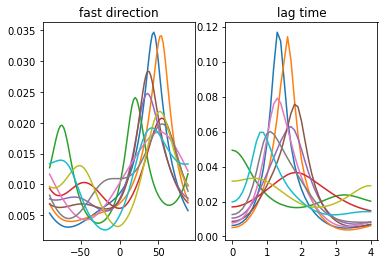

In [30]:
# Error analysis
fig,ax = plt.subplots(2)
ax0 = plt.subplot(121)
ax1 = plt.subplot(122)

for a in bs.listM:
    ax0.plot(a.degs[0,:],a.fastprofile())
    ax1.plot(a.lags[:,0],a.lagprofile())
    
# ax0.axvline(a.fast)
# ax0.axvline(a.fast-2*a.dfast,alpha=0.5)
# ax0.axvline(a.fast+2*a.dfast,alpha=0.5)
ax0.set_title('fast direction')

# ax1.axvline(a.lag)
# ax1.axvline(a.lag-2*a.dlag,alpha=0.5)
# ax1.axvline(a.lag+2*a.dlag,alpha=0.5)
ax1.set_title('lag time')

plt.show()

In [20]:
bs.listM[0].fastprofile().sum()

0.99999999999999989

# Distributions in Parameter Space

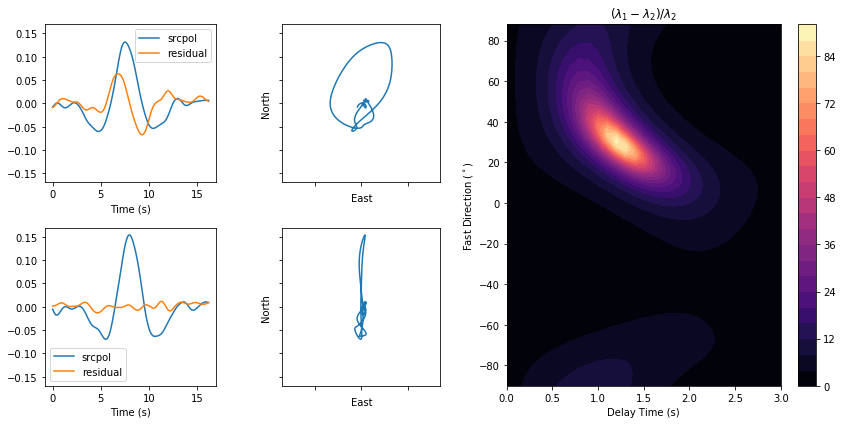

In [33]:
a = sw.EigenM(noise=0.04,split=(30,1.2),delta=0.05,lags=(3,))
a.plot()

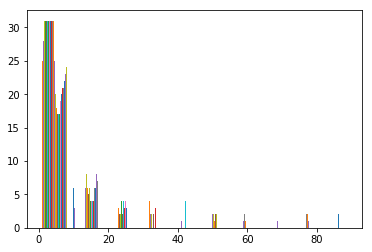

In [36]:

# # lam1
# plt.hist(a.lam1)
# plt.show()

# # lam2
# plt.hist(a.lam2)
# plt.show()

# lam1 / lam2
plt.hist((a.lam1-a.lam2)/a.lam2)
plt.show()


In [1]:
from scipy.interpolate import interp1d

def val_at_alpha(data,alpha):
    """
    Find value of function at the alpha level
    """
    idx = np.argsort(data)
    cum = np.cumsum(data[idx])
    tot = np.max(cum)
    get_x_at_cum = interp1d(cum, np.arange(cum.size))
    get_val_at_x = interp1d(np.arange(data.size), data[idx])
    xval = get_x_at_cum(tot*alpha)
    return get_val_at_x(xval)

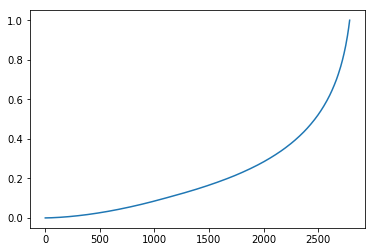

In [56]:
vals = ((a.lam1-a.lam2)/a.lam2)
d = vals / np.sum(vals)

idx = np.argsort(d.ravel())
cum = np.cumsum(d.ravel()[idx])
tot = np.max(cum)
get_x_at_cum = interp1d(cum, np.arange(cum.size))

plt.plot(cum)

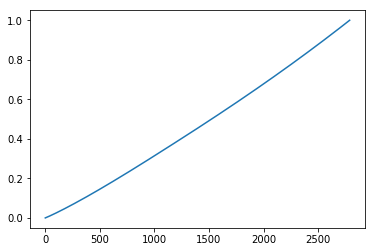

In [51]:
d = a.lam1 / np.sum(a.lam1)

idx = np.argsort(d.ravel())
cum = np.cumsum(d.ravel()[idx])
tot = np.max(cum)
get_x_at_cum = interp1d(cum, np.arange(cum.size))

plt.plot(cum)

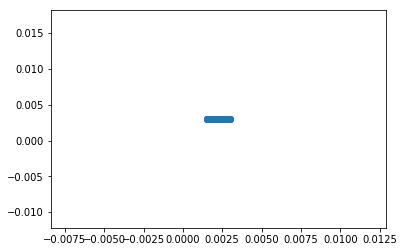

In [58]:
# Plot in lambda1 lambda2 co-ordinates
x = np.ravel(a.lam1.ravel())
y = np.ravel(a.lam2.ravel())

plt.scatter(x,x+y)

